In [1]:
import os 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import joblib

from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [3]:
import optuna

In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
from lightgbm import LGBMRegressor, LGBMClassifier

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00    0.00    1
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00    0.00    1
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00    0.00    1
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00    0.00    1
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00    0.26    1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...     ...  ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06    0.00    7
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59    0.00    7
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64    0.00    7
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57    0.00    7
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67    0.00    7

[213 rows x 11 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [8]:
df.describe()

1     1.52101       13.64        4.49        1.10       71.78  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.000000    1.518353   13.406761    2.676056    1.446526   72.655023   
std     61.631972    0.003039    0.818371    1.440453    0.499882    0.774052   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.000000    1.516520   12.900000    2.090000    1.190000   72.280000   
50%    108.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.000000    1.519150   13.830000    3.600000    1.630000   73.090000   
max    214.000000    1.533930   17.380000    3.980000    3.500000   75.410000   

             0.06        8.75        0.00      0.00.1         1.1  
count  213.000000  213.000000  213.000000  213.000000  213.000000  
mean     0.499108    8.957934    0.175869    0.057277    2.788732  
std      0.653035    1.426435    0.498245    0.097589    2.105130  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.130000    8.240000    0.000000    0.000000    1.000000  
50%      0.560000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.180000    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

In [9]:
df['1'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        3
2        4
3        5
4        6
      ... 
208    210
209    211
210    212
211    213
212    214
Name: 1, Length: 213, dtype: int64>

In [10]:
for col in df:
    print(col, df[col].nunique())

1 213
1.52101 177
13.64 142
4.49 93
1.10 117
71.78 132
0.06 65
8.75 143
0.00 34
0.00.1 32
1.1 6


In [11]:
df["1.1"] = df["1.1"].astype("category")
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   1        213 non-null    int64   
 1   1.52101  213 non-null    float64 
 2   13.64    213 non-null    float64 
 3   4.49     213 non-null    float64 
 4   1.10     213 non-null    float64 
 5   71.78    213 non-null    float64 
 6   0.06     213 non-null    float64 
 7   8.75     213 non-null    float64 
 8   0.00     213 non-null    float64 
 9   0.00.1   213 non-null    float64 
 10  1.1      213 non-null    category
dtypes: category(1), float64(9), int64(1)
memory usage: 17.2 KB


In [12]:
df.corr().style.background_gradient(cmap = 'coolwarm')

<AxesSubplot:xlabel='1.1', ylabel='count'>

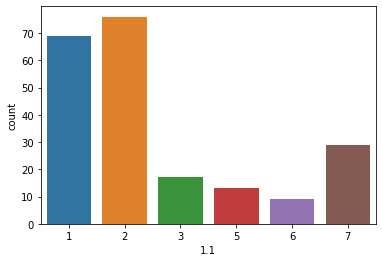

In [13]:
sns.countplot(x = df['1.1'])

In [14]:
X = df.drop('1.1', axis = 1)
y = df['1.1']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                  shuffle=True,
                                                  stratify=y)

KNeighbors Classifier

In [16]:
knn = KNeighborsClassifier()
param_dist1 = {'n_neighbors' : [i for i in range(1, 100)],
             'weights' : ['uniform','distance'],
             'metric' : ['minkowski', 'manhattan']}
rcv1 = RandomizedSearchCV(knn, param_distributions = param_dist1, n_iter = 10, cv = 5)
rcv1.fit(X, y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'weights': ['uniform', 'distance']})

In [17]:
print(rcv1.best_score_)
print(rcv1.best_params_)

0.8725359911406423
{'weights': 'distance', 'n_neighbors': 22, 'metric': 'manhattan'}


In [18]:
knn_final = KNeighborsClassifier(**rcv1.best_params_).fit(X_train, y_train)

In [19]:
cross_val_score(knn_final, X_test, y_test, cv = 10, scoring = 'f1_weighted', n_jobs=-1).mean()

0.7955555555555556

In [20]:
knn_final.score(X_train, y_train), knn_final.score(X_test, y_test)

(1.0, 0.984375)

In [21]:
y_pred = knn_final.predict(X_test)

In [22]:
print("Intersection matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Test Data Classification Report: \n", classification_report(y_test, y_pred))

Intersection matrix: 
 [[21  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  1  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  9]] 

Test Data Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        23
           3       0.83      1.00      0.91         5
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         9

    accuracy                           0.98        64
   macro avg       0.97      0.96      0.96        64
weighted avg       0.99      0.98      0.98        64



Using the Naive Bayes Method

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
cross_val_score(nb, X_test, y_test, cv = 10, scoring = 'f1_weighted', n_jobs=-1).mean()

0.7413492063492063

In [25]:
nb.score(X_train, y_train), nb.score(X_test, y_test)

(0.8590604026845637, 0.90625)

In [26]:
y_pred = nb.predict(X_test)

In [27]:
print("Intersection matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Test Data Classification Report: \n", classification_report(y_test, y_pred))

Intersection matrix: 
 [[21  0  0  0  0  0]
 [ 2 19  2  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  1  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  9]] 

Test Data Classification Report: 
               precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       0.95      0.83      0.88        23
           3       0.71      1.00      0.83         5
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         2
           7       0.90      1.00      0.95         9

    accuracy                           0.91        64
   macro avg       0.91      0.89      0.88        64
weighted avg       0.92      0.91      0.90        64



decision tree

In [28]:
dt = DecisionTreeClassifier()
param_dist3 = {'max_depth': [None, 2, 3, 4, 5, 6],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [5, 10, 12],
             'max_leaf_nodes': [10, 15, 20, None]}
rcv2 = RandomizedSearchCV(dt, param_distributions = param_dist3, n_iter = 10, cv = 5)
rcv2.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 15, 20, None],
                                        'min_samples_split': [5, 10, 12]})

In [29]:
print(rcv2.best_estimator_)
print(rcv2.best_params_)
rcv2.best_score_

DecisionTreeClassifier(max_depth=5, min_samples_split=5)
{'min_samples_split': 5, 'max_leaf_nodes': None, 'max_depth': 5, 'criterion': 'gini'}


0.8634551495016611

In [30]:
dt_final = DecisionTreeClassifier(**rcv2.best_params_)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [31]:
cross_val_score(dt_final, X_test, y_test, cv = 10, scoring = 'f1_weighted', n_jobs=-1).mean()

0.930952380952381

In [32]:
dt_final.score(X_train, y_train), dt_final.score(X_test, y_test)

(1.0, 0.96875)

In [33]:
y_pred = nb.predict(X_test)

In [34]:
print("Intersection matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Test Data Classification Report: \n", classification_report(y_test, y_pred))

Intersection matrix: 
 [[21  0  0  0  0  0]
 [ 2 19  2  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  1  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  9]] 

Test Data Classification Report: 
               precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       0.95      0.83      0.88        23
           3       0.71      1.00      0.83         5
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         2
           7       0.90      1.00      0.95         9

    accuracy                           0.91        64
   macro avg       0.91      0.89      0.88        64
weighted avg       0.92      0.91      0.90        64



Random Forest Classifier

In [35]:
rf = RandomForestClassifier()
param_dist3 = {'n_estimators' : [100, 120, 150, 200], 'criterion': ['gini', 'entropy']}
rcv3 = RandomizedSearchCV(rf, param_distributions = param_dist3, n_iter = 10, cv = 10)
rcv3.fit(X, y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [100, 120, 150, 200]})

In [36]:
print(rcv3.best_params_)
rcv3.best_score_

{'n_estimators': 100, 'criterion': 'entropy'}


0.9489177489177489

In [37]:
rf_final = RandomForestClassifier(**rcv3.best_params_)
rf_final.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [38]:
cross_val_score(rf_final, X_test, y_test, cv = 10, scoring = 'f1_weighted', n_jobs=-1).mean()

0.8680045351473922

In [39]:
rf_final.score(X_train, y_train), rf_final.score(X_test, y_test)

(1.0, 0.953125)

In [40]:
y_pred = rf_final.predict(X_test)

In [41]:
print("Intersection matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Test Data Classification Report: \n", classification_report(y_test, y_pred))

Intersection matrix: 
 [[21  0  0  0  0  0]
 [ 1 22  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  1  0  8]] 

Test Data Classification Report: 
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00         5
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       0.89      0.89      0.89         9

    accuracy                           0.95        64
   macro avg       0.93      0.93      0.93        64
weighted avg       0.95      0.95      0.95        64



LightGBM

In [42]:
lgbm = LGBMClassifier()
lgbm_params = {"learning_rate": np.arange(1e-4,2.0,0.001),
               "n_estimators": [2000,2500,3000,3500,4000,4500,5000],
               "max_depth": [3,5,6,8,10,12]}
rcv4 = RandomizedSearchCV(lgbm, param_distributions = lgbm_params, n_iter = 10, cv = 5, n_jobs=-1)
rcv4.fit(X, y)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([1.0000e-04, 1.1000e-03, 2.1000e-03, ..., 1.9971e+00, 1.9981e+00,
       1.9991e+00]),
                                        'max_depth': [3, 5, 6, 8, 10, 12],
                                        'n_estimators': [2000, 2500, 3000, 3500,
                                                         4000, 4500, 5000]})

In [43]:
print(rcv4.best_params_)
rcv4.best_score_

{'n_estimators': 4000, 'max_depth': 3, 'learning_rate': 0.0881}


0.9054263565891473

In [44]:
lgbm = LGBMClassifier(**rcv4.best_params_)
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.0881, max_depth=3, n_estimators=4000)

In [45]:
cross_val_score(lgbm, X_test, y_test, cv = 10, scoring = 'f1_weighted', n_jobs=-1).mean()

0.9290476190476191

In [46]:
lgbm.score(X_train, y_train), lgbm.score(X_test, y_test)

(1.0, 0.9375)

In [47]:
y_pred = lgbm.predict(X_test)

In [48]:
print("Intersection matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Test Data Classification Report: \n", classification_report(y_test, y_pred))

Intersection matrix: 
 [[21  0  0  0  0  0]
 [ 1 22  0  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0  1  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  8]] 

Test Data Classification Report: 
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.96      0.98        23
           3       0.80      0.80      0.80         5
           5       0.75      0.75      0.75         4
           6       0.67      1.00      0.80         2
           7       1.00      0.89      0.94         9

    accuracy                           0.94        64
   macro avg       0.86      0.90      0.87        64
weighted avg       0.94      0.94      0.94        64



# Student Grades Prediction

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [51]:
df.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

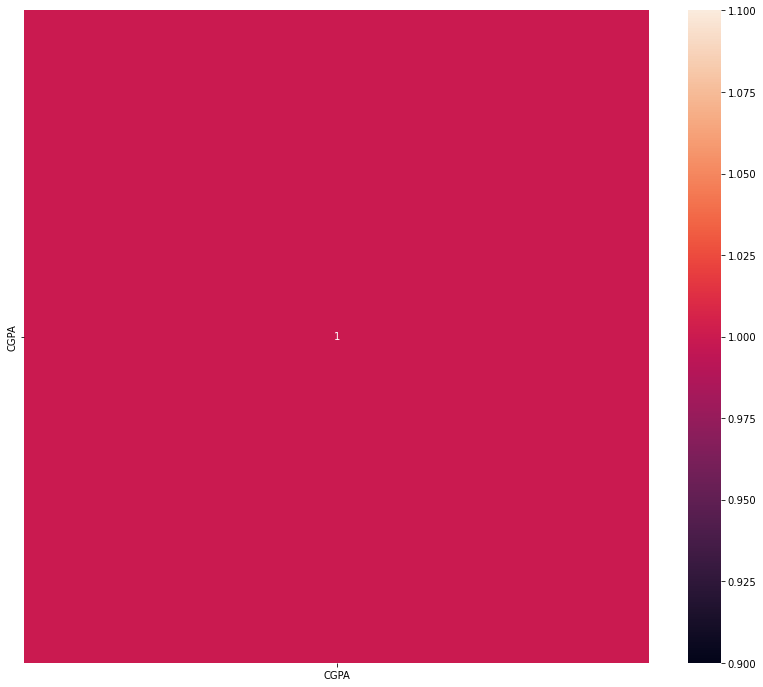

In [52]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot = True)
plt.show

checking for null data

In [53]:
df.isnull()

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0       False   False   False   False      False   False   False   False   
1       False   False   False   False      False   False   False   False   
2       False   False   False   False      False   False   False   False   
3       False   False   False   False      False   False   False   False   
4       False   False   False   False      False   False   False   False   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566     False   False   False   False      False   False   False   False   
567     False   False   False   False      False   False   False   False   
568     False   False   False   False      False   False   False   False   
569     False   False   False   False      False   False   False   False   
570     False   False   False   False      False   False   False   False   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0     False   False  ...   False   False   False   False   False   False   
1     False   False  ...   False   False   False   False   False   False   
2     False   False  ...   False   False   False   False   False   False   
3     False   False  ...   False   False   False   False   False   False   
4     False   False  ...   False   False   False   False   False   False   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566   False   False  ...   False   False   False   False   False   False   
567   False   False  ...   False   False   False   False   False   False   
568   False   False  ...   False   False   False   False   False   False   
569   False   False  ...   False   False   False   False   False   False   
570   False   False  ...   False   False   False   False   False   False   

     CS-419  CS-423  CS-412   CGPA  
0     False   False   False  False  
1     False   False   False  False  
2     False   False   False  False  
3     False   False   False  False  
4     False   False   False  False  
..      ...     ...     ...    ...  
566   False   False   False  False  
567   False   False   False  False  
568   False   False   False  False  
569   False   False   False  False  
570   False   False   False  False  

[571 rows x 43 columns]

In [54]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [55]:
df.isnull().sum().sum()

425

Fill null values

In [56]:
df2 = df.fillna(value = 0)
df2

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [57]:
df2.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [58]:
df2.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [59]:
nonnumeric_columns = [df2.columns[index]for index, dtypes in enumerate(df2.dtypes) if dtypes == 'object']
nonnumeric_columns

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [60]:
for columns in nonnumeric_columns:
    print(f'(columns):{df2[columns].unique()}')

(columns):['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043' 'CS-97044' 'CS-97045' 'CS-97046' 'CS-97047' 'CS-97048'
 'CS-97049' 'CS-97050' 'CS-97051' 'CS-97052' 'CS-97053' 'CS-97054'
 'CS-97055' 'CS-97056' 'CS-97057' 'CS-97058' 'CS-97059' 'CS-97060'
 'CS-97061' 'CS-97062' 'CS-97063' 'CS-97064' 'CS-97065' 'CS-97066'
 'CS-97067' 'CS-97068' 'CS-97069' 'CS-97070' 'CS-97071' 'CS-97072'
 'CS-97073' 'CS-97074' 'CS-97075' 'CS-97076' 'CS-97077' 'CS-97078'
 'CS-97079' 'CS-97080' 'CS-97081' 'CS-97082' 'CS-97083' 'CS-97084'
 'CS-97085' 'CS-97086' 'CS-97087' 'CS-97088' 'CS-970

In [61]:
df2.drop([ 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412'], axis = 1, inplace = True)

In [62]:
df2

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119 ME-107 CS-107 HS-205/20 MT-222 EE-222 MT-224 CS-210   CGPA  
0       B-     C-     C-        B+      D     A-     B-     C+  2.205  
1       D+      D     B+        C+     B-     C-     D+     D+  2.008  
2       A-     A-     B-        A-      A      A      A      A  3.608  
3        D     C+      D         B     D+     B-      D      C  1.906  
4        A     A-      C         A      A     A-     A-     A-  3.448  
..     ...    ...    ...       ...    ...    ...    ...    ...    ...  
566     A+     B+     A+         A     A+      A      A      A  3.798  
567      A      A     A+        B+     C+     A-      B      A  3.772  
568      A      B     A+        B-      B     B+      B     A-  3.470  
569     B-     C-     A+        C+      D      D      B     B-  2.193  
570      C     D+     B-        C+     C-     B+     D+     B+  1.753  

[571 rows x 18 columns]

In [63]:
df2['PH-121']=df2['PH-121'].apply(lambda x: 'P_+ x')


In [64]:
df2['HS-101']=df2['HS-101'].apply(lambda x: 'H_+ x')


In [65]:
df2['CY-105']=df2['CY-105'].apply(lambda x: 'C_+ x')

In [66]:
df2['HS-105/12']=df2['HS-105/12'].apply(lambda x: 'HS_+x')


In [67]:
df2['MT-111']=df2['MT-111'].apply(lambda x: 'M_+x')


In [68]:
df2['CS-105']=df2['CS-105'].apply(lambda x: 'CS_+x')
df2['CS-106']=df2['CS-106'].apply(lambda x: 'CSS_+x')
df2['EL-102']=df2['EL-102'].apply(lambda x: 'E_+x')
df2['EE-119']=df2['EE-119'].apply(lambda x: 'EE_+x')
df2['ME-107']=df2['ME-107'].apply(lambda x: 'ME_+x')
df2['CS-107']=df2['CS-107'].apply(lambda x: 'CS_+x')
df2['HS-205/20']=df2['HS-205/20'].apply(lambda x: 'HS_+x')
df2['MT-222']=df2['MT-222'].apply(lambda x: 'MT_+x')
df2['EE-222']=df2['EE-222'].apply(lambda x: 'EEE_+x')
df2['MT-224']=df2['MT-224'].apply(lambda x: 'MTT_+x')
df2['CS-210']=df2['CS-210'].apply(lambda x: 'CSSS_+x')

In [69]:
df2

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105  CS-106 EL-102  \
0    CS-97001  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
1    CS-97002  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
2    CS-97003  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
3    CS-97004  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
4    CS-97005  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
..        ...    ...    ...    ...       ...    ...    ...     ...    ...   
566  CS-97567  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
567  CS-97568  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
568  CS-97569  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
569  CS-97570  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
570  CS-97571  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   

    EE-119 ME-107 CS-107 HS-205/20 MT-222  EE-222  MT-224   CS-210   CGPA  
0    EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  2.205  
1    EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  2.008  
2    EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  3.608  
3    EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  1.906  
4    EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  3.448  
..     ...    ...    ...       ...    ...     ...     ...      ...    ...  
566  EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  3.798  
567  EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  3.772  
568  EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  3.470  
569  EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  2.193  
570  EE_+x  ME_+x  CS_+x     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  1.753  

[571 rows x 18 columns]

In [70]:
pd.get_dummies(df2['PH-121'])

P_+ x
0        1
1        1
2        1
3        1
4        1
..     ...
566      1
567      1
568      1
569      1
570      1

[571 rows x 1 columns]

In [71]:
dummies = pd.concat([pd.get_dummies(df2['PH-121']),
                    pd.get_dummies(df2['HS-101']),
                    pd.get_dummies(df2['CY-105']),
                    pd.get_dummies(df2['HS-105/12']),
                    pd.get_dummies(df2['MT-111']),
                    pd.get_dummies(df2['CS-105']),
                    pd.get_dummies(df2['CS-106']),
                    pd.get_dummies(df2['EL-102']),
                    pd.get_dummies(df2['EE-119']),
                    pd.get_dummies(df2['ME-107']),
                    pd.get_dummies(df2['HS-205/20']),
                    pd.get_dummies(df2['MT-222']),
                    pd.get_dummies(df2['EE-222']),
                    pd.get_dummies(df2['MT-224']),
                    pd.get_dummies(df2['CS-210'])],axis = 1)

In [72]:
dummies

P_+ x  H_+ x  C_+ x  HS_+x  M_+x  CS_+x  CSS_+x  E_+x  EE_+x  ME_+x  \
0        1      1      1      1     1      1       1     1      1      1   
1        1      1      1      1     1      1       1     1      1      1   
2        1      1      1      1     1      1       1     1      1      1   
3        1      1      1      1     1      1       1     1      1      1   
4        1      1      1      1     1      1       1     1      1      1   
..     ...    ...    ...    ...   ...    ...     ...   ...    ...    ...   
566      1      1      1      1     1      1       1     1      1      1   
567      1      1      1      1     1      1       1     1      1      1   
568      1      1      1      1     1      1       1     1      1      1   
569      1      1      1      1     1      1       1     1      1      1   
570      1      1      1      1     1      1       1     1      1      1   

     HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  
0        1      1       1       1        1  
1        1      1       1       1        1  
2        1      1       1       1        1  
3        1      1       1       1        1  
4        1      1       1       1        1  
..     ...    ...     ...     ...      ...  
566      1      1       1       1        1  
567      1      1       1       1        1  
568      1      1       1       1        1  
569      1      1       1       1        1  
570      1      1       1       1        1  

[571 rows x 15 columns]

In [73]:
df2 = pd.concat([df2,dummies],axis = 1)

In [74]:
df2

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105  CS-106 EL-102  \
0    CS-97001  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
1    CS-97002  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
2    CS-97003  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
3    CS-97004  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
4    CS-97005  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
..        ...    ...    ...    ...       ...    ...    ...     ...    ...   
566  CS-97567  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
567  CS-97568  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
568  CS-97569  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
569  CS-97570  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
570  CS-97571  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   

    EE-119  ... CS_+x CSS_+x E_+x EE_+x ME_+x HS_+x MT_+x  EEE_+x  MTT_+x  \
0    EE_+x  ...     1      1    1     1     1     1     1       1       1   
1    EE_+x  ...     1      1    1     1     1     1     1       1       1   
2    EE_+x  ...     1      1    1     1     1     1     1       1       1   
3    EE_+x  ...     1      1    1     1     1     1     1       1       1   
4    EE_+x  ...     1      1    1     1     1     1     1       1       1   
..     ...  ...   ...    ...  ...   ...   ...   ...   ...     ...     ...   
566  EE_+x  ...     1      1    1     1     1     1     1       1       1   
567  EE_+x  ...     1      1    1     1     1     1     1       1       1   
568  EE_+x  ...     1      1    1     1     1     1     1       1       1   
569  EE_+x  ...     1      1    1     1     1     1     1       1       1   
570  EE_+x  ...     1      1    1     1     1     1     1       1       1   

     CSSS_+x  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
566        1  
567        1  
568        1  
569        1  
570        1  

[571 rows x 33 columns]

In [75]:
df2.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CGPA         float64
P_+ x          uint8
H_+ x          uint8
C_+ x          uint8
HS_+x          uint8
M_+x           uint8
CS_+x          uint8
CSS_+x         uint8
E_+x           uint8
EE_+x          uint8
ME_+x          uint8
HS_+x          uint8
MT_+x          uint8
EEE_+x         uint8
MTT_+x         uint8
CSSS_+x        uint8
dtype: object

Scaling 

In [76]:
y = df2['CGPA']
x = df2.drop('CGPA',axis = 1)

In [77]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [78]:
df2.drop('Seat No.',axis = 1)

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105  CS-106 EL-102 EE-119 ME-107  \
0    P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
1    P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
2    P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
3    P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
4    P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
..     ...    ...    ...       ...    ...    ...     ...    ...    ...    ...   
566  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
567  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
568  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
569  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   
570  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x  EE_+x  ME_+x   

     ... CS_+x CSS_+x E_+x EE_+x ME_+x HS_+x  MT_+x  EEE_+x  MTT_+x  CSSS_+x  
0    ...     1      1    1     1     1     1      1       1       1        1  
1    ...     1      1    1     1     1     1      1       1       1        1  
2    ...     1      1    1     1     1     1      1       1       1        1  
3    ...     1      1    1     1     1     1      1       1       1        1  
4    ...     1      1    1     1     1     1      1       1       1        1  
..   ...   ...    ...  ...   ...   ...   ...    ...     ...     ...      ...  
566  ...     1      1    1     1     1     1      1       1       1        1  
567  ...     1      1    1     1     1     1      1       1       1        1  
568  ...     1      1    1     1     1     1      1       1       1        1  
569  ...     1      1    1     1     1     1      1       1       1        1  
570  ...     1      1    1     1     1     1      1       1       1        1  

[571 rows x 32 columns]

In [79]:
df2

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105  CS-106 EL-102  \
0    CS-97001  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
1    CS-97002  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
2    CS-97003  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
3    CS-97004  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
4    CS-97005  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
..        ...    ...    ...    ...       ...    ...    ...     ...    ...   
566  CS-97567  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
567  CS-97568  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
568  CS-97569  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
569  CS-97570  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   
570  CS-97571  P_+ x  H_+ x  C_+ x     HS_+x   M_+x  CS_+x  CSS_+x   E_+x   

    EE-119  ... CS_+x CSS_+x E_+x EE_+x ME_+x HS_+x MT_+x  EEE_+x  MTT_+x  \
0    EE_+x  ...     1      1    1     1     1     1     1       1       1   
1    EE_+x  ...     1      1    1     1     1     1     1       1       1   
2    EE_+x  ...     1      1    1     1     1     1     1       1       1   
3    EE_+x  ...     1      1    1     1     1     1     1       1       1   
4    EE_+x  ...     1      1    1     1     1     1     1       1       1   
..     ...  ...   ...    ...  ...   ...   ...   ...   ...     ...     ...   
566  EE_+x  ...     1      1    1     1     1     1     1       1       1   
567  EE_+x  ...     1      1    1     1     1     1     1       1       1   
568  EE_+x  ...     1      1    1     1     1     1     1       1       1   
569  EE_+x  ...     1      1    1     1     1     1     1       1       1   
570  EE_+x  ...     1      1    1     1     1     1     1       1       1   

     CSSS_+x  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
566        1  
567        1  
568        1  
569        1  
570        1  

[571 rows x 33 columns]

In [80]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [130]:
X

1   1.52101     13.64      4.49      1.10     71.78      0.06  \
0   -1.723938 -0.245101  0.591880  0.642937 -0.173500  0.097091 -0.029329   
1   -1.707675 -0.716826  0.150946  0.608144  0.187433  0.433777 -0.167472   
2   -1.691411 -0.228607 -0.240996  0.705564 -0.313863 -0.058303  0.108813   
3   -1.675147 -0.307777 -0.167507  0.656854 -0.414122  0.550322  0.078115   
4   -1.658884 -0.789399 -0.755419  0.649895  0.347848  0.407878  0.216258   
..        ...       ...       ...       ...       ...       ...       ...   
208  1.658884 -0.700332  0.898085 -1.862164  2.874379 -0.058303 -0.643296   
209  1.675147 -0.495808  1.853443 -1.862164  1.089766  0.524423 -0.766090   
210  1.691411  0.757727  1.167545 -1.862164  1.149921  0.990604 -0.766090   
211  1.707675 -0.607966  1.192041 -1.862164  0.989506  1.236644 -0.766090   
212  1.723938 -0.410039  1.008318 -1.862164  1.270232  0.912907 -0.766090   

         8.75      0.00    0.00.1  
0   -0.792599 -0.353808 -0.588301  
1   -0.827734 -0.353808 -0.588301  
2   -0.518546 -0.353808 -0.588301  
3   -0.623951 -0.353808 -0.588301  
4   -0.623951 -0.353808  2.082200  
..        ...       ...       ...  
208  0.156046  1.778672 -0.588301  
209 -0.392060  2.844912 -0.588301  
210 -0.363952  2.945501 -0.588301  
211 -0.335844  2.804676 -0.588301  
212 -0.237466  3.005854 -0.588301  

[213 rows x 10 columns]

TRAINING

In [131]:
encoder = LabelEncoder()
for column in nonnumeric_columns:
    df[column] = encoder.fit_transform(df[column])
    


KeyError: 'Seat No.'

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
y = df2['CGPA']
x = df2.drop('CGPA',axis = 1)

In [134]:
x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [136]:
model = LinearRegression()


In [137]:
model.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [138]:
print(f'Model R2:{model.score(x_test,y_test)}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

BANK MARKETING

In [110]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [111]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [112]:
df.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [113]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [114]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Explore Categorical Data 

In [116]:
feature_with_nan=[feature for feature in df.columns if df [feature].isnull().sum()]
for feature in feature_with_nan:
    print(feature,np.round(df [feature].isnull().mean(),4, '%missing values'))
else:
    print("no missing values found")


no missing values found


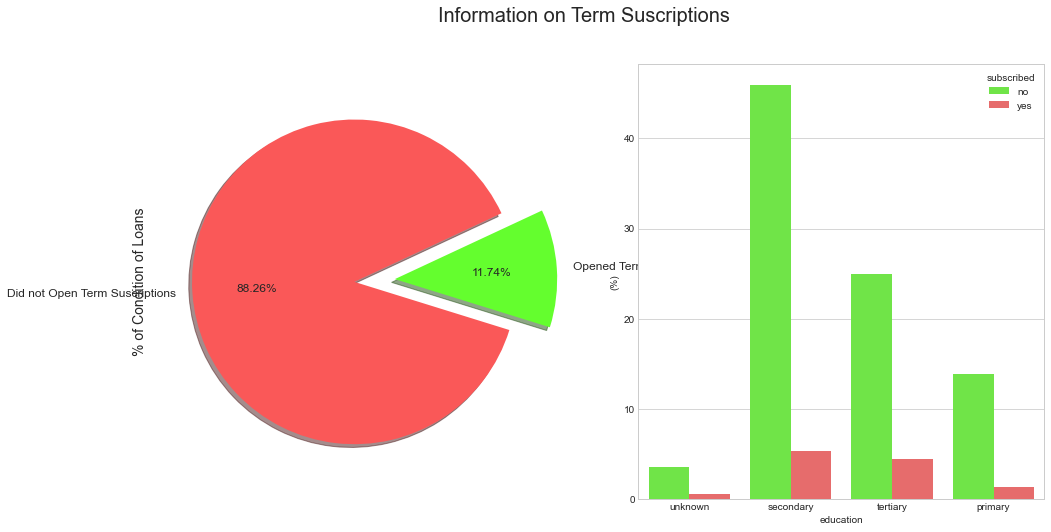

In [117]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["subscribed"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="subscribed", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()


In [118]:
categorical_features=[feature for feature in df.columns if df [feature].dtypes=='0']
categorical_features

[]

In [119]:
categorical_features

[]

In [120]:
for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format (feature, len(df [feature].unique())))
    


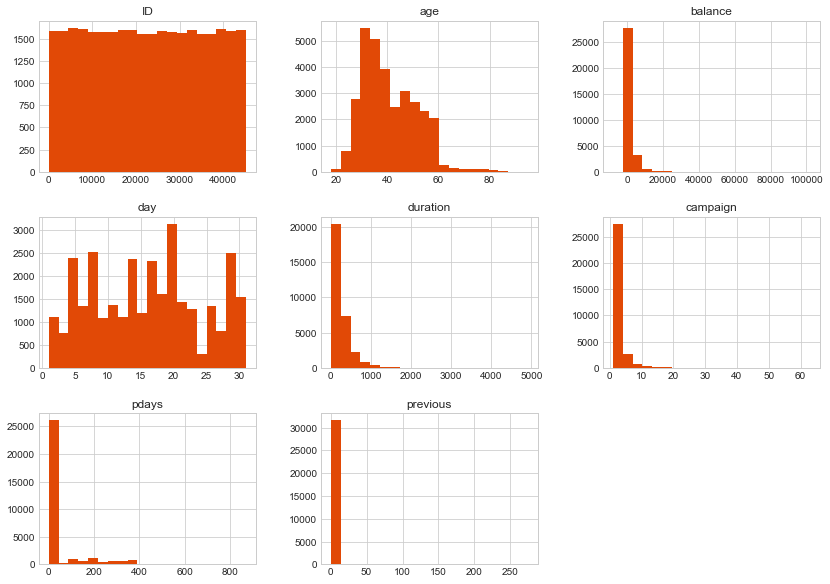

In [121]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [139]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

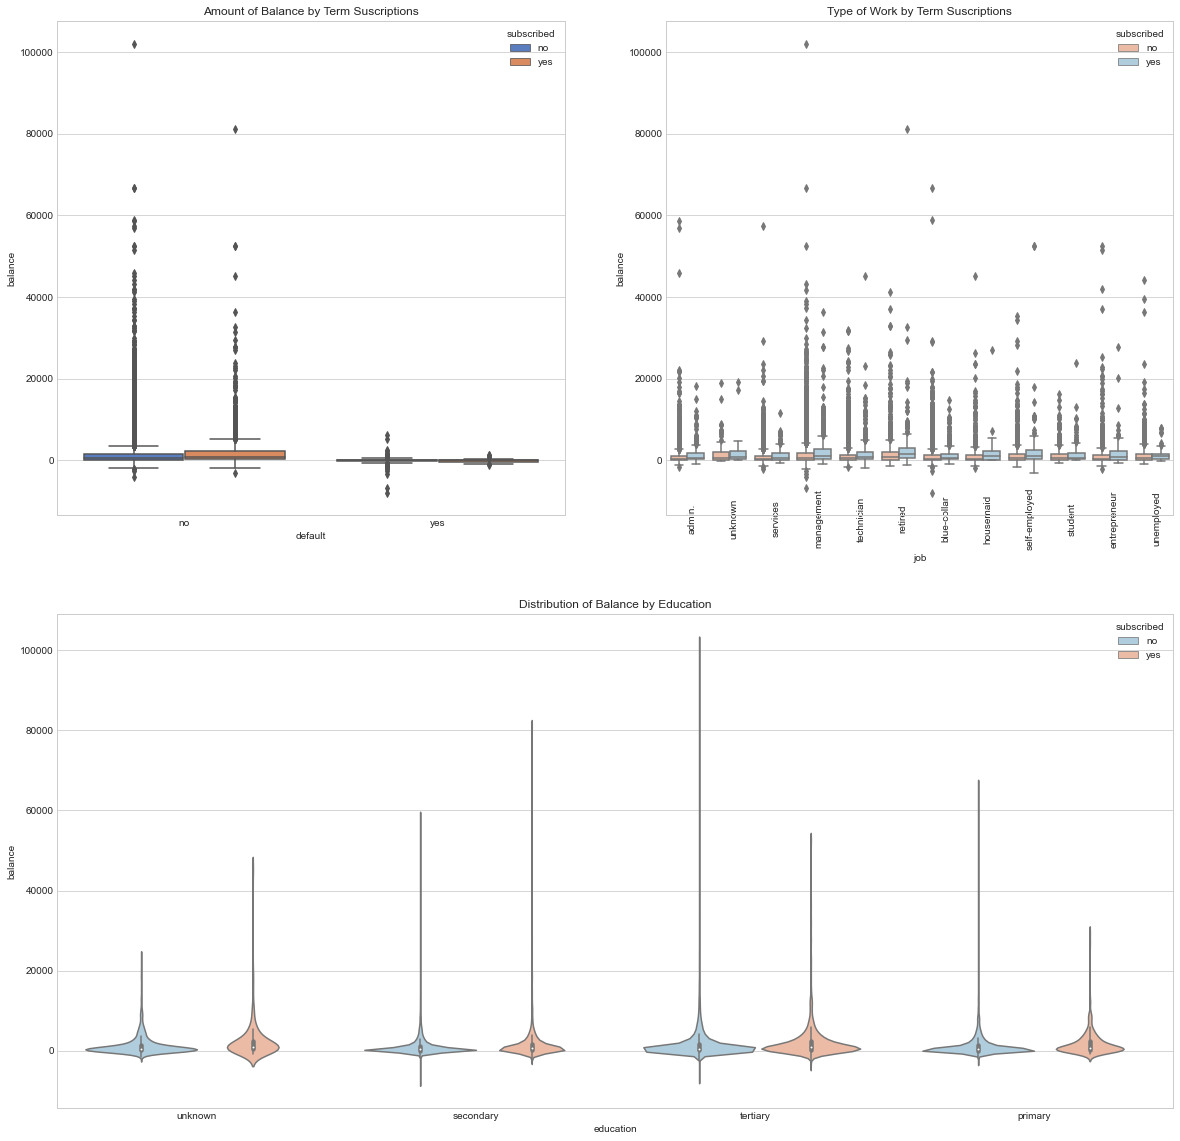

In [140]:

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="subscribed",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="subscribed",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="subscribed", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()


In [141]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [142]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [143]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [144]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [149]:
import plotly.express as px

In [153]:
import plotly.graph_objects as go

In [160]:
from plotly.offline import iplot

In [161]:
import squarify
df = df.drop(df.loc[df["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [162]:

# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["subscribed"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [163]:
# Balance Distribution

# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'radialaxis'

Did you mean "coloraxis"?

    Valid properties:
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to an
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to an "opacity" to see
            multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to an "opacity" to see multiple
            bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "coloraxis"?

Bad property path:
radialaxis
^^^^^^^^^^

In [164]:
df['marital'].value_counts()

married     17332
single       8357
divorced     3306
Name: marital, dtype: int64

In [165]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [166]:
df['marital'].value_counts().tolist()

[17332, 8357, 3306]

In [167]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [171]:
import plotly.tools as tls

In [173]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tls.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\Rakesh\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [174]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56  management   married    unknown      no     1933      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   
6  40444   56     retired   married  secondary      no     1044      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   
6  telephone    3   jul       353         2     -1         0  unknown   

  subscribed balance_status  
0         no            low  
2         no            low  
3        yes            low  
4         no            low  
6        yes            low

In [176]:
import plotly.figure_factory as ff

In [177]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [179]:
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='subscribed',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

In [180]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [181]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()


ID  age         job   marital  education default  balance housing loan  \
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   
6  40444   56     retired   married  secondary      no     1044      no   no   
7  40194   50  technician    single  secondary      no     1811      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   
6  telephone    3   jul       353         2     -1         0  unknown   
7   cellular    8   jun        97         4     -1         0  unknown   

  subscribed balance_status  marital/education  
2         no            low  married/secondary  
3        yes            low  divorced/tertiary  
4         no            low  married/secondary  
6        yes            low  married/secondary  
7         no            low   single/secondary

LinAlgError: 1-th leading minor of the array is not positive definite

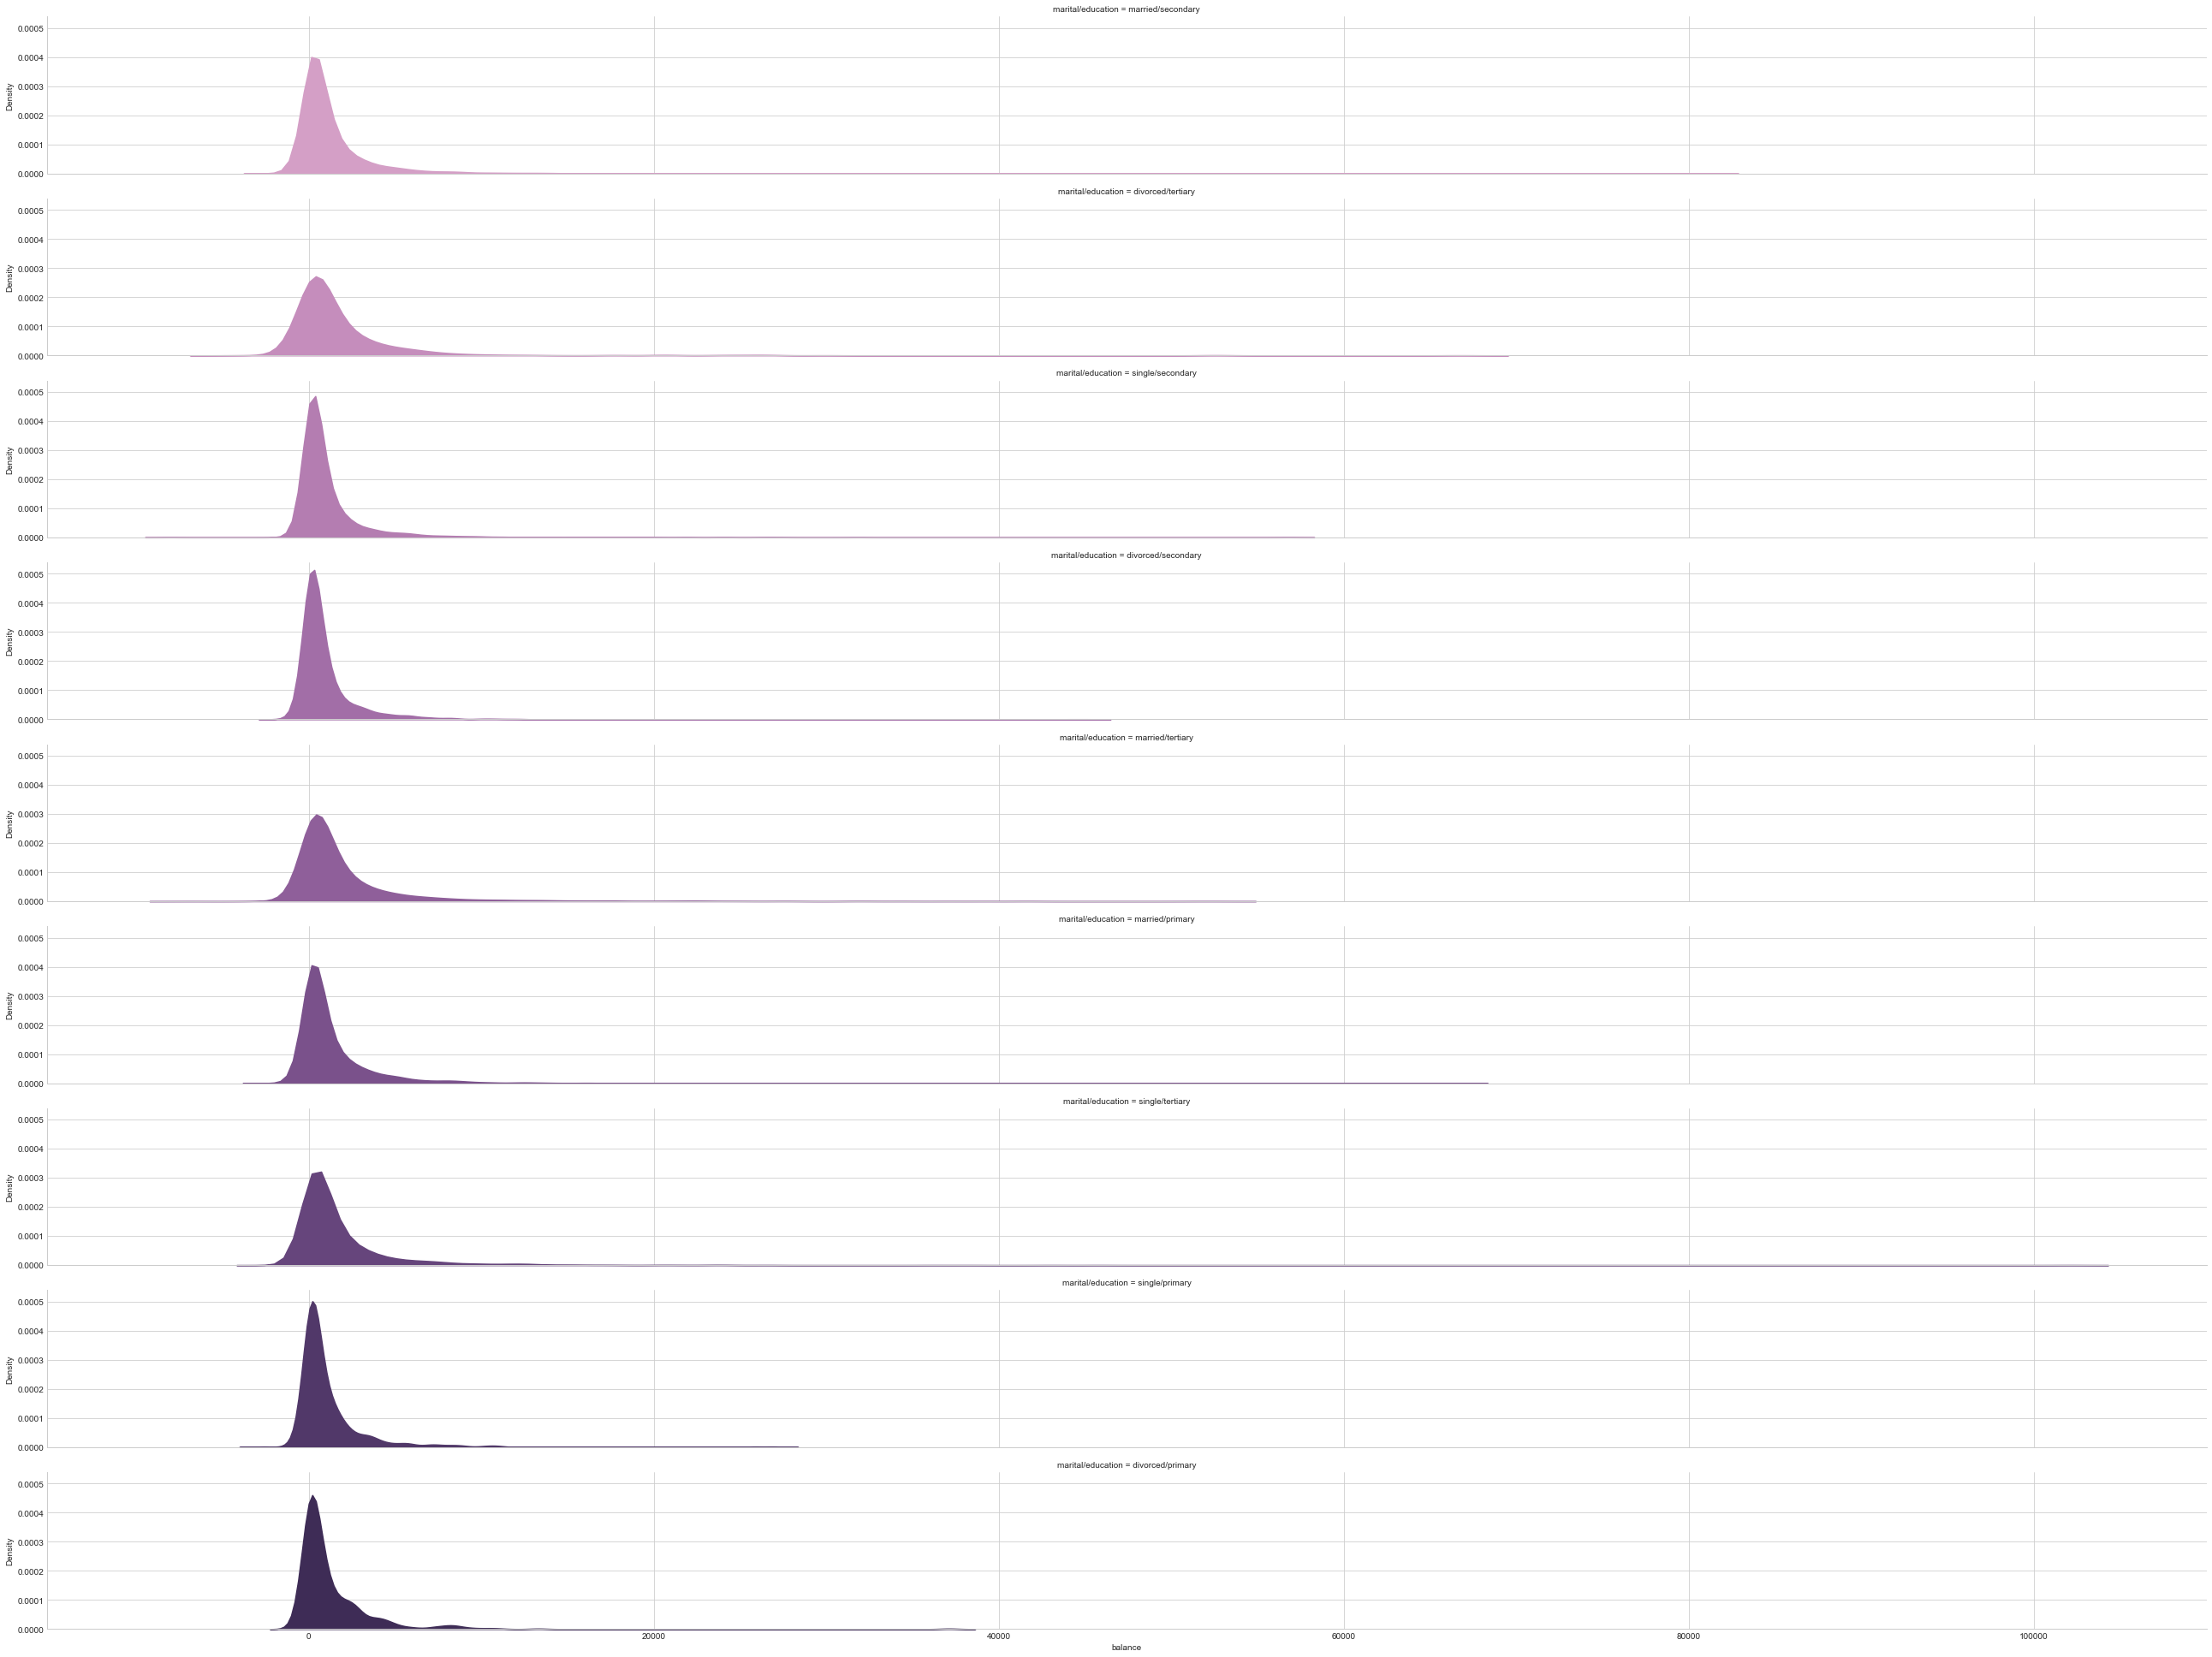

In [183]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

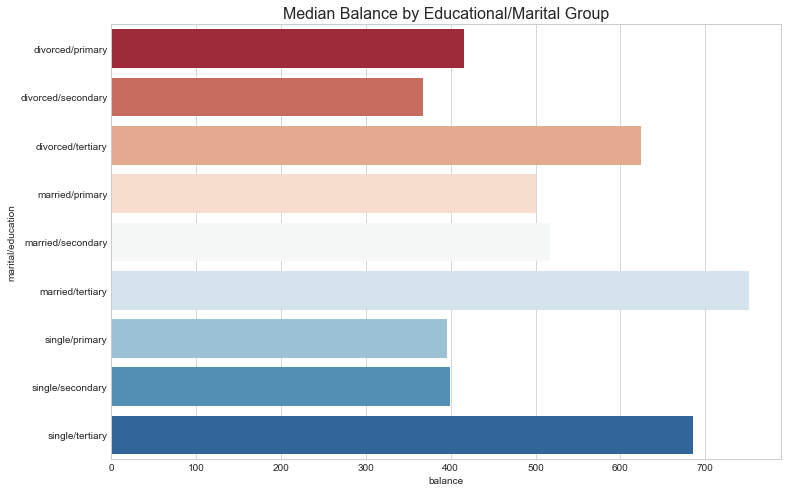

In [184]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [185]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

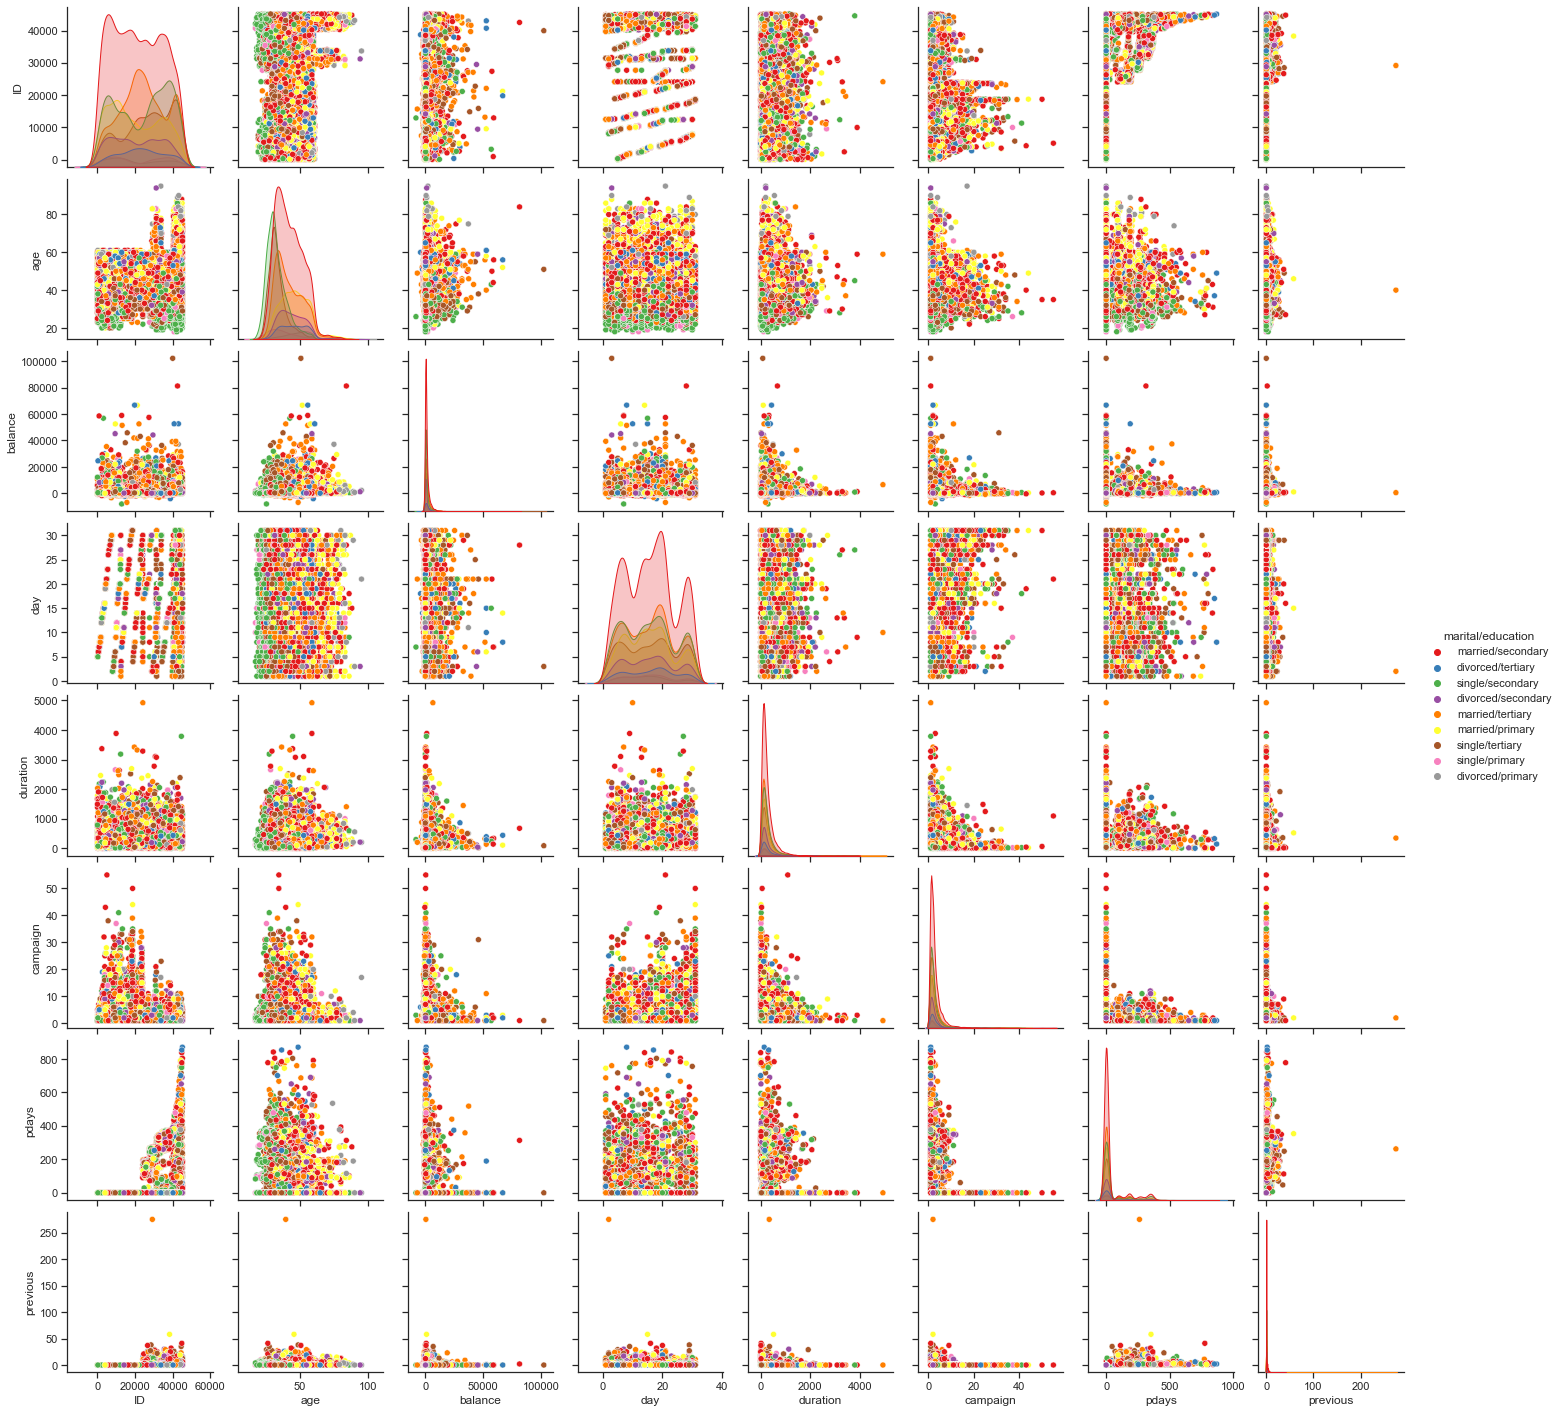

In [186]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

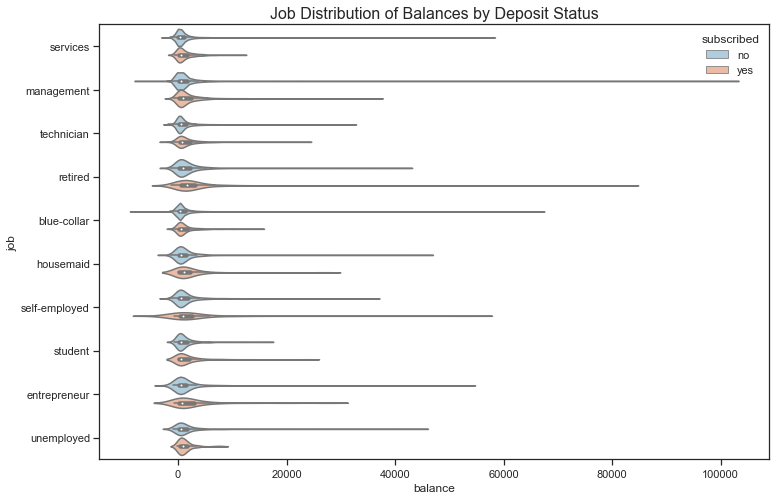

In [188]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="subscribed", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

In [189]:
df.drop(['marital/education', 'balance_status'], axis=1, inplace=True)

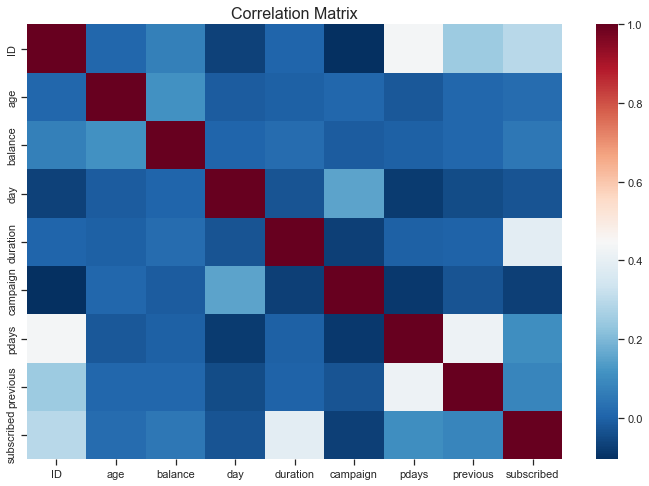

In [190]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['subscribed'] = LabelEncoder().fit_transform(df['subscribed'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

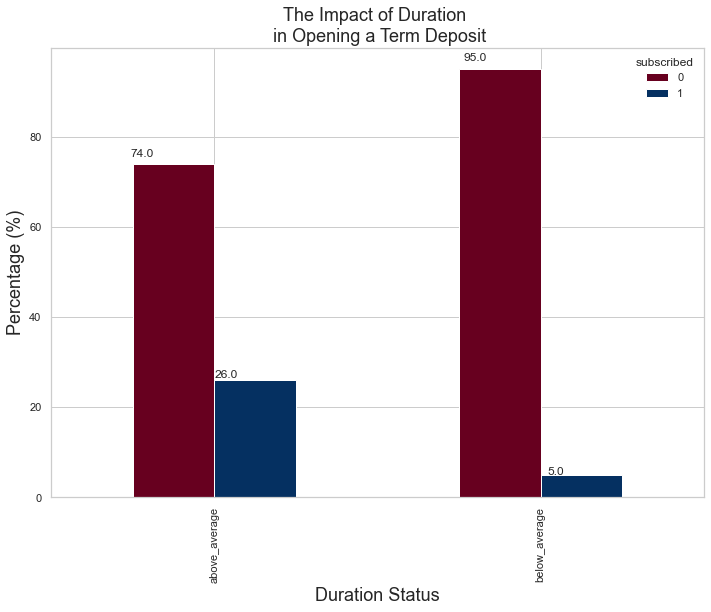

In [192]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['subscribed']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [208]:
term_deposits = df.copy()

In [216]:
stratified_train = df.copy()
stratified_test = df.copy()

In [217]:

dep = term_deposits['subscribed']
term_deposits.drop(labels=['subscribed'], axis=1,inplace=True)
term_deposits.insert(0, 'subscribed', dep)
term_deposits.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
term_deposits["housing"].value_counts()/len(term_deposits)

yes    0.569321
no     0.430679
Name: housing, dtype: float64

In [218]:
term_deposits["loan"].value_counts()/len(term_deposits)

no     0.833896
yes    0.166104
Name: loan, dtype: float64

In [222]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

KeyError: '[13826, 24756, 3347, 1046, 25008, 18795, 18192, 19748, 16939, 21965, 9187, 26848, 3201, 25516, 17496, 5311, 12324, 14183, 19283, 10777, 370, 3077, 5635, 16384, 15281, 12736, 5985, 3522, 19376, 6343, 24321, 20561, 5572, 13608, 11007, 21799, 2344, 26594, 8665, 25086, 732, 4362, 13345, 8160, 15551, 23275, 18613, 24725, 8343, 17258, 14799, 15585, 10051, 9779, 5015, 24255, 18609, 9591, 5984, 11391, 9489, 8889, 9058, 8009, 16998, 21422, 3506, 2359, 23273, 11111, 22146, 4842, 8427, 6621, 6034, 26761, 20332, 4175, 18284, 25551, 6315, 18972, 2958, 9419, 8309, 3146, 23298, 11095, 20260, 724, 22670, 26604, 13162, 6243, 7485, 5481, 1711, 27408, 23673, 19817, 13782, 15294, 23346, 5280, 7536, 10251, 6646, 18213, 25988, 14489, 70, 10327, 678, 26538, 10226, 4000, 26411, 25390, 3830, 13357, 9047, 8484, 21097, 24939, 6289, 18401, 21310, 8002, 4820, 6751, 18356, 14380, 16866, 9358, 21734, 5025, 18053, 1882, 14090, 3072, 8549, 3651, 23798, 1073, 1120, 23268, 9882, 13480, 23445, 8502, 10644, 15065, 25508, 3510, 25869, 16814, 12795, 13710, 16119, 9862, 18495, 342, 22270, 1163, 2387, 26391, 24901, 8461, 1016, 5622, 3850, 12594, 5652, 982, 2595, 20141, 21043, 8658, 12485, 5537, 11746, 10675, 7565, 6038, 21676, 20936, 15865, 1815, 10199, 16554, 7526, 18349, 25401, 11100, 7432, 24239, 9939, 8891, 23770, 27369, 26158, 3016, 22232, 10982, 14749, 33, 16890, 8090, 597, 3693, 24908, 26332, 15360, 26845, 11143, 8148, 1646, 12562, 12667, 16781, 769, 27456, 14509, 536, 27055, 1540, 18909, 26790, 12023, 26056, 5738, 1785, 22421, 20325, 6228, 15942, 24621, 25637, 5267, 19432, 21529, 17950, 1023, 5325, 6566, 10293, 8683, 18245, 11174, 1648, 27830, 2396, 27689, 26122, 201, 17146, 25700, 20176, 25579, 13072, 22914, 22757, 21088, 18899, 20179, 22429, 1898, 24523, 19870, 25593, 27754, 19420, 12776, 541, 317, 9161, 1899, 21265, 3414, 12344, 10867, 19741, 2033, 14225, 24193, 391, 3255, 1662, 11646, 4329, 21785, 5613, 24537, 24572, 23128, 16035, 4852, 16379, 26586, 26589, 12973, 1306, 4178, 11618, 1868, 6136, 23513, 20436, 15481, 23235, 8711, 15880, 13494, 26461, 23916, 22305, 22168, 1400, 10824, 5140, 23887, 25889, 6221, 2419, 12585, 1142, 9039, 3059, 19331, 1174, 1129, 1910, 25689, 6190, 2372, 24311, 23740, 10659, 5492, 26688, 2539, 2860, 13955, 24797, 13026, 7904, 9583, 20826, 10851, 7807, 8069, 11696, 18729, 20483, 22364, 11673, 20195, 18723, 14629, 16556, 31, 24438, 15526, 10800, 20221, 21562, 17594, 722, 7645, 26739, 5204, 19075, 9166, 25443, 23443, 17331, 12995, 6119, 20281, 2401, 72, 15539, 11505, 8017, 4192, 25215, 9001, 4257, 18464, 25532, 25915, 17373, 18389, 5338, 25482, 9663, 14158, 14569, 16430, 3044, 11559, 27139, 5494, 26120, 10941, 11914, 22214, 25743, 13805, 18793, 15142, 19408, 9396, 879, 2779, 17218, 7096, 17486, 18535, 10256, 22804, 6204, 19031, 16553, 3615, 26839, 8325, 16217, 7343, 19492, 22249, 7989, 8553, 7358, 7942, 6844, 10656, 7470, 2863, 20387, 76, 15815, 15693, 11062, 14582, 17300, 6053, 12730, 13232, 22023, 119, 11500, 17916, 18024, 18431, 26396, 5518, 13730, 15323, 20676, 25164, 16863, 8583, 4592, 25648, 7474, 27488, 21889, 23077, 17560, 1600, 10393, 8975, 19335, 7036, 3953, 15595, 17127, 23169, 2865, 22786, 12066, 17663, 1259, 17990, 6265, 4271, 17458, 8790, 5847, 21077, 21790, 10735, 9269, 9108, 11723, 20015, 17198, 1731, 26701, 19301, 7504, 7767, 13714, 9984, 1549, 21569, 22227, 14741, 23154, 9146, 10848, 16130, 16099, 12244, 18286, 27809, 5722, 24048, 3398, 19505, 4956, 2239, 11479, 24500, 22226, 15105, 24273, 23999, 2486, 15762, 17807, 19229, 23643, 1972, 12743, 9223, 11380, 13403, 7267, 16194, 27668, 21691, 664, 2417, 6617, 8566, 7980, 18877, 27300, 4854, 9424, 4314, 24254, 5390, 6735, 22487, 3173, 23328, 8904, 206, 14943, 16292, 5771, 23452, 10818, 14519, 17599, 2218, 22882, 16783, 9494, 14488, 9522, 19112, 18321, 11679, 7534, 15962, 21808, 26709, 14767, 9626, 19677, 22331, 22944, 10151, 18329, 15473, 1908, 22048, 5653, 20342, 21597, 14019, 18745, 1014, 21066, 3869, 18220, 1845, 16873, 8179, 13923, 8824, 10015, 18788, 6649, 22020, 25064, 6331, 1724, 4246, 13463, 4365, 24027, 23931, 23024, 8784, 18722, 11899, 7843, 3157, 1776, 9763, 18230, 7130, 27130, 13545, 1692, 11394, 8159, 5580, 3666, 9252, 24802, 18834, 13338, 14648, 16697, 1717, 5939, 25537, 12553, 1890, 24656, 19086, 23541, 18337, 21273, 21463, 917, 18761, 18225, 21358, 4011, 2444, 7629, 18110, 26210, 17879, 26588, 10096, 5460, 19993, 20003, 20503, 6350, 13817, 16393, 17045, 27000, 17505, 8252, 21497, 10216, 437, 11378, 5423, 12501, 11106, 17535, 11406, 22787, 27245, 21187, 16042, 24527, 7156, 18200, 20479, 22694, 16530, 12285, 20818, 3340, 20595, 1464, 21491, 13860, 9505, 13906, 14113, 17783, 9248, 12257, 7055, 5121, 10522, 15825, 20359, 750, 5413, 10409, 12263, 25018, 23885, 15216, 19911, 21092, 23774, 2982, 27663, 1317, 8071, 11613, 5649, 14748, 2784, 7132, 12612, 20606, 2311, 25862, 14393, 13621, 23948, 4284, 25471, 11813, 14937, 12200, 25744, 4295, 9422, 2580, 27446, 26466, 18696, 1247, 13809, 23019, 4473, 26479, 23805, 16154, 19115, 25707, 9088, 15292, 22028, 16378, 1554, 26844, 8946, 24483, 24365, 19076, 3224, 13767, 10764, 3564, 3082, 22111, 19497, 9456, 2736, 26754, 5366, 20111, 272, 3384, 22934, 21739, 8079, 21519, 22870, 25069, 23671, 21238, 25434, 12472, 14684, 5800, 16772, 7884, 4558, 1944, 14131, 8407, 10252, 9254, 3484, 22539, 6937, 27159, 19837, 10518, 27279, 7408, 6021, 5741, 7876, 2264, 16470, 4041, 11873, 7997, 396, 9403, 27637, 19576, 7675, 10609, 14901, 14223, 10625, 8360, 23696, 22770, 12759, 563, 1933, 19224, 14212, 24128, 13158, 27140, 12379, 241, 15263, 17274, 16618, 10478, 18059, 16596, 8744, 27612, 8542, 21873, 22038, 21113, 19712, 1264, 16054, 10462, 5916, 8272, 10988, 6227, 27544, 9404, 12948, 27175, 12283, 18339, 20324, 3983, 22778, 1275, 4188, 1009, 3599, 12133, 17025, 19341, 1866, 14879, 63, 17787, 14314, 18561, 3682, 12800, 1418, 20233, 9243, 23125, 2630, 13323, 1019, 19827, 23393, 17741, 22764, 26840, 9712, 10585, 16223, 65, 12603, 5676, 14269, 26605, 12204, 26058, 10155, 7867, 24229, 20540, 13631, 24232, 8473, 23112, 19413, 21397, 11978, 21414, 17868, 20782, 9669, 10468, 17380, 2160, 431, 15378, 22435, 13833, 4176, 6551, 7606, 22209, 22072, 22393, 17325, 5303, 14101, 22919, 10728, 5086, 1638, 21120, 23039, 1668, 20907, 15895, 7307, 16661, 139, 5655, 26719, 16738, 24482, 23212, 12399, 3877, 6441, 14317, 1720, 16491, 21738, 5541, 203, 25209, 1054, 24323, 9179, 24705, 23577, 10961, 2100, 16014, 12097, 7331, 10966, 4290, 18368, 3756, 24087, 6300, 25445, 18313, 12045, 25753, 7124, 14616, 16749, 17168, 3887, 5142, 8357, 12497, 11828, 26100, 20374, 21012, 16941, 20769, 11778, 15033, 20703, 21135, 23190, 20743, 16794, 13445, 10476, 1787, 16969, 11474, 13397, 24941, 6884, 4107, 27391, 4089, 3202, 17152, 2939, 2760, 14197, 25814, 22853, 4814, 6325, 19546, 21413, 20333, 11631, 26059, 15891, 13009, 6409, 8085, 14210, 12420, 25686, 208, 13753, 13539, 7542, 10262, 1792, 14815, 6781, 25832, 1175, 11560, 13125, 17050, 18333, 25460, 19247, 3895, 17265, 6206, 6953, 15611, 2781, 26532, 23145, 5672, 6750, 18685, 20733, 797, 4688, 6002, 25103, 21954, 9894, 561, 5515, 21202, 13740, 8141, 15333, 916, 12976, 2742, 14656, 25569, 3267, 12888, 15330, 15707, 25331, 5932, 6635, 16763, 26095, 23203, 4105, 11698, 24741, 15518, 15208, 21052, 10588, 24073, 20340, 17795, 5596, 648, 20983, 25327, 6344, 26304, 6357, 3802, 217, 5326, 24360, 21544, 18898, 18792, 9049, 4119, 3574, 5728, 11383, 5, 1782, 22397, 17723, 7183, 4549, 19933, 1809, 8930, 20590, 20419, 405, 6742, 17801, 16353, 7071, 25162, 4655, 22390, 20637, 25285, 8950, 4392, 23897, 21880, 5833, 4677, 9928, 24397, 27442, 27601, 25922, 13666, 11092, 4483, 5522, 13940, 25262, 1405, 21706, 17531, 11614, 19017, 8293, 13777, 9109, 2970, 12657, 25307, 16079, 23802, 7069, 11119, 11547, 14994, 22726, 15631, 27684, 8621, 110, 13209, 9102, 22489, 20895, 24355, 1352, 11568, 15616, 4313, 2727, 19385, 27261, 14981, 17763, 23806, 3720, 8554, 12432, 19617, 23628, 3358, 22436, 21522, 25060, 5439, 5082, 19406, 490, 6776, 11605, 18640, 16015, 13047, 5172, 25423, 3770, 9942, 12390, 27422, 10689, 3071, 20207, 15567, 17889, 26685, 24734, 9616, 6308, 2730, 9310, 2548, 4897, 18733, 6283, 15802, 26898, 26804, 16791, 21264, 730, 27344, 27402, 16020, 11656, 22524, 6597, 12119, 3984, 22620, 14193, 14034, 13597, 12248, 1287, 1365, 2738, 19502, 4478, 24356, 3221, 1634, 20455, 11328, 22154, 25928, 744, 25735, 325, 19568, 19687, 0, 9199, 21295, 5879, 23972, 17876, 6327, 19299, 20699, 14237, 15238, 13378, 23706, 16293, 21563, 16490, 13642, 1249, 12224, 16821, 10664, 16394, 7301, 3592, 27192, 20459, 11366, 21239, 24994, 24250, 17160, 22059, 7361, 12569, 12036, 19886, 11690, 12883, 10011, 20690, 13804, 4754, 2768, 4422, 20139, 15213, 5117, 13455, 7581, 27473, 878, 18906, 9979, 25201, 14763, 24903, 9152, 515, 13905, 5379, 24265, 5354, 22383, 18753, 18628, 10600, 12315, 5302, 17459, 1536, 831, 5856, 19271, 25034, 6083, 10857, 99, 6970, 21064, 22528, 10358, 8026, 6269, 26282, 17506, 2439, 3573, 23701, 6456, 22986, 9518, 11232, 24595, 2086, 12779, 19257, 4339, 15812, 8522, 17195, 10228, 8577, 11290, 13858, 17904, 25573, 18423, 14049, 4244, 21142, 15570, 13351, 11306, 11113, 5656, 27705, 12920, 24013, 26715, 4962, 3068, 1018, 9373, 8333, 7411, 16453, 11347, 27332, 13614, 15414, 26773, 12346, 1303, 4451, 401, 16961, 9062, 13975, 27757, 16176, 13779, 14403, 16693, 1278, 1995, 4664, 10027, 2579, 7297, 921, 22874, 22743, 6731, 15593, 11340, 20700, 15434, 20522, 3704, 26458, 11841, 12770, 10646, 9188, 8806, 19851, 15059, 4638, 4564, 12913, 27751, 17292, 15575, 2042, 20418, 4781, 15206, 2559, 1092, 8324, 3527, 22172, 9086, 2792, 25104, 16084, 11636, 22325, 17655, 25074, 22954, 14899, 24178, 19764, 115, 2377, 11533, 26321, 27166, 17508, 27281, 21123, 23695, 16570, 13129, 11916, 20395, 1672, 27800, 26946, 23429, 6411, 10634, 4649, 21156, 6588, 1621, 5606, 3731, 5581, 9898, 19065, 2128, 20974, 20892, 17854, 19908, 25092, 2316, 21620, 466, 18182, 7615, 12566, 22094, 7472, 17718, 1777, 18656, 15031, 16962, 16816, 12684, 25158, 21357, 16828, 22664, 61, 10636, 3218, 12113, 14175, 21405, 26034, 16723, 9436, 17067, 3923, 6623, 26531, 7180, 15487, 4086, 25154, 5215, 23641, 13251, 18783, 9588, 17061, 26676, 5444, 14891, 2013, 15779, 11919, 3282, 5733, 7990, 9592, 19317, 12318, 23990, 27414, 11350, 1146, 16302, 26504, 27015, 15285, 18010, 3087, 4269, 13109, 26049, 26729, 3708, 6371, 3686, 8081, 11180, 5588, 5100, 23417, 3096, 27623, 13354, 25113, 21013, 18582, 19665, 10, 25810, 19753, 18484, 10132, 13443, 1122, 16999, 14098, 1676, 6789, 21081, 11943, 19663, 22604, 16039, 23629, 15635, 4279, 11927, 27368, 5483, 21521, 3405, 12618, 10732, 24111, 8787, 21634, 23548, 574, 23300, 17327, 16682, 6809, 24231, 18080, 6564, 25843, 26156, 18645, 6959, 10448, 15118, 27506, 13665, 20627, 12593, 22707, 5182, 15205, 576, 2006, 19025, 18619, 18923, 7346, 27098, 11966, 25670, 100, 4954, 13273, 20016, 454, 5617, 11980, 1857, 21380, 11079, 7652, 13115, 20674, 14782, 19122, 19849, 19806, 5119, 20533, 4062, 19619, 9153, 18273, 4427, 5912, 20714, 3019, 20938, 4889, 1409, 6052, 4121, 9992, 17958, 6207, 6479, 20656, 12968, 9537, 5226, 12316, 25946, 1218, 2758, 212, 6761, 10718, 1491, 17585, 19716, 4623, 3612, 23812, 2197, 18149, 23932, 12463, 20181, 26064, 21648, 8123, 14102, 7445, 733, 19569, 4436, 6596, 13912, 13225, 3444, 17550, 22893, 9335, 7649, 1079, 3964, 7820, 8630, 19871, 19498, 4866, 7437, 7165, 18094, 15080, 10008, 26792, 15749, 9820, 21644, 24149, 9247, 16850, 8099, 8949, 8006, 17847, 12027, 526, 22731, 16820, 7676, 18855, 13239, 22962, 11745, 12370, 8209, 27756, 8311, 8559, 5027, 21565, 23158, 154, 22066, 18320, 5195, 2600, 15469, 16160, 25013, 6625, 13347, 18858, 13299, 26465, 13532, 18888, 7574, 14173, 15328, 17436, 10976, 2829, 17733, 11355, 14959, 2231, 13037, 12910, 13102, 6758, 25541, 11529, 27660, 16068, 6577, 5660, 10126, 19233, 1, 13048, 23428, 18013, 21723, 18360, 14848, 10102, 22616, 6682, 2592, 15951, 15737, 17935, 18343, 12652, 7660, 9718, 1166, 25680, 7930, 8251, 19212, 12159, 2723, 18559, 27263, 6580, 4533, 11972, 704, 20757, 18301, 18422, 20262, 25632, 457, 23147, 23213, 9875, 12912, 21731, 7663, 19535, 1926, 19466, 11133, 13086, 9716, 18644, 26478, 4930, 17914, 18806, 14770, 25288, 26783, 21717, 15212, 18886, 18752, 16948, 5037, 6073, 7484, 17353, 20698, 3021, 12651, 17511, 24753, 2030, 15720, 977, 3792, 24858, 2721, 24220, 16503, 12861, 23389, 20914, 924, 5913, 25468, 8538, 22570, 20544, 17980, 27157, 3915, 22811, 9876, 26329, 2601, 27330, 3215, 27538, 27200, 20625, 5684, 22022, 11587, 3332, 6730, 24268, 18671, 24440, 13742, 3056, 3486, 12760, 25402, 223, 6886, 27474, 13641, 12894, 23856, 22779, 4289, 19495, 20378, 17579, 26966, 8266, 22886, 4809, 9869, 1788, 1417, 27711, 23663, 11045, 8413, 1765, 24272, 25822, 9805, 19126, 12745, 8594, 26079, 2438, 25002, 13304, 15474, 7497, 22618, 16883, 26503, 5211, 3065, 4406, 20921, 6779, 25415, 27632, 1504, 2000, 7191, 25225, 13924, 10971, 25853, 5793, 3823, 6840, 10709, 24169, 15838, 22050, 23337, 21336, 24117, 12794, 12183, 19820, 17730, 11433, 19776, 18849, 14397, 26043, 19384, 21172, 9037, 9253, 9839, 11665, 22930, 13456, 26954, 19150, 7033, 15983, 27635, 26116, 26005, 3412, 19786, 18065, 15158, 12043, 21006, 22950, 12236, 18481, 6097, 23700, 3237, 24221, 20564, 27255, 23301, 19430, 26009, 4940, 25396, 26331, 26620, 7021, 582, 12575, 7285, 10538, 20410, 3233, 1058, 3990, 637, 4187, 3107, 1833, 12832, 10952, 26111, 2950, 1268, 24062, 9475, 12893, 10078, 4910, 2577, 15390, 26828, 24370, 723, 6657, 10159, 15950, 3578, 8644, 25161, 8957, 26802, 4709, 18639, 8349, 14463, 5417, 11603, 27823, 27227, 22067, 15022, 16420, 8317, 23180, 20884, 1743, 23250, 12449, 16148, 25781, 4444, 25151, 26167, 6928, 13174, 27706, 24490, 19532, 2471, 24240, 6929, 12145, 8027, 12342, 17279, 11759, 12675, 20104, 5129, 1297, 8636, 2870, 6828, 6081, 5778, 27214, 24033, 13127, 17390, 8214, 17044, 12541, 27634, 8270, 20201, 20990, 128, 18157, 6670, 20579, 7366, 10755, 9808, 13353, 2075, 5920, 17319, 17645, 10742, 1912, 7127, 17584, 26320, 13963, 15295, 12436, 11320, 19469, 19167, 6725, 2556, 3737, 22632, 15446, 19145, 19309, 4776, 13065, 7878, 11011, 8354, 5755, 3364, 9447, 2952, 11945, 24950, 14062, 12264, 25790, 24439, 25672, 6556, 19910, 24481, 2003, 13774, 1605, 946, 20229, 19508, 4496, 17547, 13831, 8264, 6552, 22269, 13448, 13877, 26862, 16630, 14140, 18562, 3600, 23179, 24266, 10089, 13457, 22884, 19980, 10449, 7276, 1997, 11195, 27011, 17514, 13285, 14069, 21888, 9203, 21711, 11259, 12060, 26285, 600, 12372, 9643, 6872, 13418, 3493, 23752, 18510, 10317, 14971, 12996, 5130, 20991, 20161, 13673, 27773, 22589, 14124, 5866, 13953, 587, 11815, 14620, 3387, 8428, 13449, 25526, 25931, 10359, 15909, 10129, 257, 15809, 16341, 11361, 12091, 10878, 10222, 17976, 18895, 8430, 853, 446, 24625, 20311, 18444, 12493, 18447, 22055, 26510, 7476, 8753, 4418, 18878, 21904, 18294, 11639, 25588, 21036, 24623, 25115, 13203, 27320, 25561, 18185, 27550, 27490, 21247, 19555, 11467, 25022, 9610, 11478, 10150, 25491, 16555, 311, 22637, 3467, 3458, 20492, 16297, 20814, 21924, 24740, 10919, 5963, 22747, 8513, 19549, 14367, 9800, 9382, 18467, 7026, 17703, 9298, 23225, 17406, 1779, 455, 27820, 2766, 24350, 10645, 26726, 5769, 11056, 24895, 2827, 11351, 728, 2566, 8752, 27034, 3503, 7871, 6213, 10575, 21941, 14304, 10026, 10074, 27270, 26163, 18997, 18370, 13708, 1499, 12796, 23782, 14278, 13823, 13300, 23504, 26460, 8007, 22442, 8016, 7597, 11897, 15531, 890, 7363, 243, 15941, 13617, 13476, 655, 14762, 21831, 5256, 459, 10324, 13862, 12964, 26312, 16330, 46, 17169, 3845, 14560, 3024, 12328, 26852, 16754, 4218, 18665, 8783, 3086, 17610, 7587, 12842, 18541, 5451, 11819, 4134, 18120, 12729, 1647, 1639, 24423, 25837, 27337, 20010, 7338, 17538, 3075, 16996, 18891, 12693, 12384, 2268, 10049, 13312, 8533, 12303, 26847, 17589, 3789, 18295, 667, 1130, 4446, 3775, 20458, 11032, 24898, 11203, 14476, 14934, 24054, 7339, 23296, 8926, 9149, 3163, 4827, 3027, 6250, 18121, 13100, 1745, 8881, 21141, 23681, 13511, 14986, 1377, 23724, 3217, 14005, 6148, 21178, 23617, 25097, 15011, 26757, 6257, 16291, 17151, 14766, 17285, 13880, 13715, 20961, 15864, 11124, 17924, 5973, 14331, 1187, 25176, 21645, 26585, 2964, 26205, 22753, 13991, 21136, 26400, 10589, 25791, 5683, 15652, 3427, 12713, 17401, 25916, 27026, 9106, 25032, 8091, 1831, 27150, 5122, 15072, 21110, 14929, 13105, 5054, 24663, 18081, 1694, 9773, 19357, 2763, 22518, 15243, 20502, 27395, 7387, 22175, 1178, 5516, 13198, 1775, 19330, 10203, 23422, 23472, 24215, 14271, 926, 5108, 23110, 4822, 9550, 22327, 12335, 12223, 6193, 4906, 23822, 2391, 13971, 22398, 1233, 9651, 25347, 24088, 10432, 7483, 5719, 2366, 1541, 25749, 1988, 21308, 15689, 16073, 25829, 9759, 6420, 10124, 9433, 5632, 3036, 16950, 14759, 4662, 22841, 8241, 10642, 24957, 8409, 21964, 9908, 6345, 11356, 25614, 26443, 2989, 26339, 20182, 3831, 27555, 12522, 24416, 21577, 5229, 22245, 10831, 12719, 13152, 4536, 27321, 23656, 8247, 15824, 4653, 7478, 14420, 6501, 11643, 15928, 11556, 23924, 20360, 9116, 19463, 11115, 19777, 8563, 17851, 10962, 16533, 14859, 8177, 1754, 25359, 2480, 2389, 9132, 18372, 1490, 23965, 25842, 13757, 8768, 15122, 26770, 7638, 2555, 3791, 17477, 10698, 5532, 12823, 23420, 349, 4395, 6200, 27779, 17276, 25994, 22230, 21041, 14144, 21443, 7551, 26772, 126, 9915, 15420, 18937, 7348, 776, 1842, 2254, 20018, 10667, 13874, 6000, 5225, 1665, 23669, 11046] not in index'

In [221]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['subscribed'].value_counts()

0    24528
1     3328
Name: subscribed, dtype: int64

In [225]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self
    


    def fit(self, X, y=None):
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))
            self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self
    
    
    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)
        
        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])
        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)
        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out


In [226]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [227]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27856 entries, 2 to 31646
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               27856 non-null  int64 
 1   age              27856 non-null  int64 
 2   job              27856 non-null  object
 3   marital          27856 non-null  object
 4   education        27856 non-null  object
 5   default          27856 non-null  object
 6   balance          27856 non-null  int64 
 7   housing          27856 non-null  object
 8   loan             27856 non-null  object
 9   contact          27856 non-null  object
 10  day              27856 non-null  int64 
 11  month            27856 non-null  object
 12  duration         27856 non-null  int64 
 13  campaign         27856 non-null  int64 
 14  pdays            27856 non-null  int64 
 15  previous         27856 non-null  int64 
 16  poutcome         27856 non-null  object
 17  subscribed       27856 non-null